In [8]:
import pandas as pd
cate=pd.read_csv('category_sum_1H.csv')
match=pd.read_csv('match.csv',index_col=0)
match=match.rename(columns={'INBND_NM':'점포명'})

In [4]:
import pandas as pd
feb=pd.read_csv('february_wet_table.csv')
feb=feb[['SALE_DATE', 'CUSTOMER_NAME', 'ITEM_NAME', 'SALE_HOUR', 'SALE_CNT','OUTBND_NM']]

In [8]:
ff=feb.groupby(['OUTBND_NM','SALE_DATE','SALE_HOUR']).sum().reset_index()

In [30]:
ff[ff['OUTBND_NM']=='이천WET센터']

,OUTBND_NM,SALE_DATE,SALE_HOUR,SALE_CNT
3261,이천WET센터,20200201.0,7,7.0
3262,이천WET센터,20200201.0,8,1098.0
3263,이천WET센터,20200201.0,9,5662.0
3264,이천WET센터,20200201.0,10,22455.0
3265,이천WET센터,20200201.0,11,30358.0
...,...,...,...,...
3753,이천WET센터,20200229.0,19,51730.0
3754,이천WET센터,20200229.0,20,37325.0
3755,이천WET센터,20200229.0,21,30987.0
3756,이천WET센터,20200229.0,22,16457.0


이천WET센터


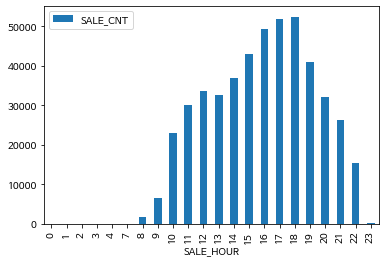

신갈WET센터


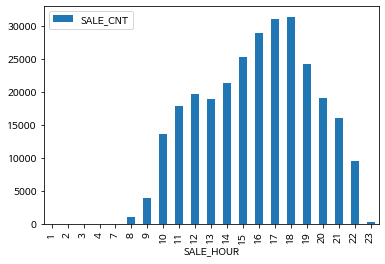

기흥WET센터


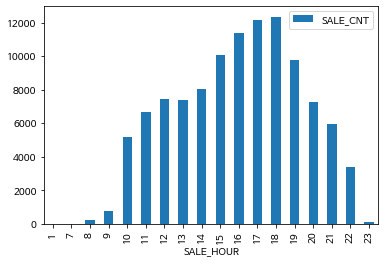

화인WET센터


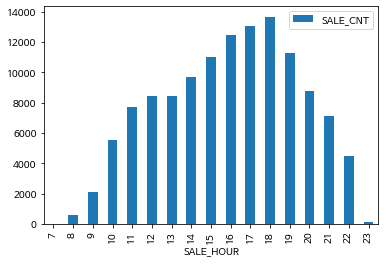

In [29]:
#점포에서 팔리는 시간//
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

import matplotlib.pyplot as plt
import seaborn as sns
for i in range(4):
    print(list(ff['OUTBND_NM'].value_counts().index)[i])
    ff[ff['OUTBND_NM']==list(ff['OUTBND_NM'].value_counts().index)[i]][['SALE_HOUR','SALE_CNT']].groupby('SALE_HOUR').mean().plot.bar()
    plt.show()

In [81]:
doo=this[this['category']=='수산/정육'].drop(['점포명','category'],axis=1).groupby(['OUTBND_NM','month']).sum().unstack().iloc[2:3,:].transpose()

In [83]:
doo.reset_index()[doo.reset_index()['month']==2][['level_0','CS광릉WET센터']].rename(columns={'level_0':'time'}).set_index('time')

OUTBND_NM,CS광릉WET센터
time,
8,6.0
9,251.0
10,6199.0
11,8823.0
12,9576.0
13,9844.0
14,11075.0
15,14306.0
16,17816.0


CS광릉WET센터


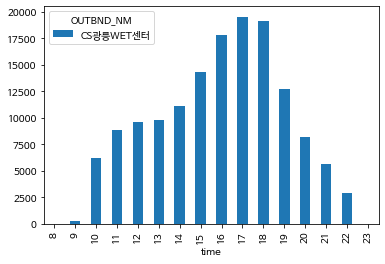

In [84]:
#점포에서 팔리는 시간//
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

import matplotlib.pyplot as plt
import seaborn as sns
# doo.groupby(['OUTBND_NM','month']).sum().unstack().iloc[:1,:].plot.bar()
print('CS광릉WET센터')
doo.reset_index()[doo.reset_index()['month']==2][['level_0','CS광릉WET센터']].rename(columns={'level_0':'time'}).set_index('time').plot.bar()
plt.show()

In [15]:
match[match['점포명']=='범서점']

,점포명,OUTBND_NM
371,범서점,신갈PC센터
526,범서점,이천DRY센터
1254,범서점,이천WET센터
2411,범서점,화인WET센터


In [81]:
query= """
     SELECT SALE_DATE, CUSTOMER_NAME, POS_NUM, RECEIPT_NUM, ITEM_NAME,SALE_TIME
     FROM top20_refine_2
     WHERE SALE_DATE BETWEEN 20200301 AND 20200331;
     """
def query_MariaDB(query):
    import pandas as pd
    import pymysql
    conn = pymysql.connect(host='10.131.107.164', port=3006,user='lglopt', password='123bigdata',database='lgl_opt_sample')
    query_result = pd.read_sql(query, conn)
    return query_result

table10=query_MariaDB(query) 

In [3]:
customer_list=table10['CUSTOMER_NAME'].value_counts().index
customer=[]
for i in range(len(customer_list)):
    customer.append(customer_list[i]+'0')

In [10]:
category=pd.read_csv('category3.csv')
category=category[category['category'].str.contains('유제품/냉장/냉동|과일/채소/쌀|수산/정육')]

In [82]:
# 2.신선식품 1시간마다 함수 
for i in range(len(customer_list)):
    import pandas as pd
    eu=pd.merge(table10[table10['CUSTOMER_NAME']==customer_list[i]],category,on='ITEM_NAME',how='left')
    eu=eu.drop_duplicates()
    eu=eu.dropna()
    eu['time']=eu['SALE_TIME'].apply(lambda x: int(x*0.0001))
    eu=eu.groupby(['time','category']).count().unstack()['ITEM_NAME'].transpose().reset_index().fillna(0)
    eu['점포명']=customer_list[i]
    eu['month']=2
    customer[i]=eu
    print(customer_list[i])

범서점
G유진점
잠원점
수성점
연수점
G복대점
장안점
서초센터
장락점
프리미엄도곡점
광주점
G화곡점
전농점
G내손점
정자점
의정부점
G춘천점
삼천점
프리미엄용호점
청전점
엑스포점
G운정점
프리미엄일원점
프리미엄공덕점
신천점
G홍제점
프리미엄서초점
G속초점
프리미엄황금점
프리미엄기흥점
부산화명점
인후점
G부곡점
서대문센터
G은마점
복현점
해운대점
남가좌점
포항점
원주점
G은평점
(폐)송내점
대연점
G마포점
연산점
프리미엄문정점
원효로점
문흥점
G속초조양
분당서현점
풍암점
용인동천점
일산점
중촌점
김해장유점
용인점
언남점
프리미엄잠실점
G고양삼송
상계11점
송파센터
수지점
상남점
하당점
서초국제점
안양점
G신곡점
오토프레시부산센터
가락점
인계점
오토프레시의왕센터
우장산점
프리미엄삼성점
행당점
율량점
여의점
대구고산점
G대림점
한마음점
G전곡점
경주점
상록수점
상계센터
성내점
장안센터
코엑스점
봉은사로점


In [91]:
import pandas as pd
eu=pd.merge(table10[table10['CUSTOMER_NAME']==customer_list[0]],category,on='ITEM_NAME',how='left')
eu=eu.drop_duplicates()
eu=eu.dropna()
eu['time']=eu['SALE_TIME'].apply(lambda x: int(x*0.0001))
eu.groupby(['time','category']).count().unstack()['ITEM_NAME'].transpose().reset_index().fillna(0)

time,category,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,가공/주류,5.0,1323.0,3210.0,3715.0,4534.0,5059.0,5606.0,6785.0,7486.0,7805.0,9270.0,8360.0,6106.0,4936.0,2994.0,5.0
1,과일/채소/쌀,0.0,1108.0,2858.0,3910.0,4618.0,4974.0,5562.0,6945.0,7947.0,7659.0,8566.0,7701.0,4753.0,3541.0,1930.0,1.0
2,수산/정육,0.0,172.0,473.0,639.0,877.0,969.0,1131.0,1485.0,1748.0,1724.0,1715.0,1449.0,828.0,561.0,293.0,0.0
3,유제품/냉장/냉동,2.0,570.0,1558.0,2158.0,2575.0,2994.0,3281.0,3976.0,4536.0,4597.0,5242.0,4799.0,2960.0,2376.0,1239.0,5.0


In [83]:
c=pd.DataFrame(columns={'점포명','month','category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23}) 
for i in range(68):
    c=pd.concat([c,customer[i]])

In [84]:
c=c[['month','점포명', 'category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].fillna(0)

In [85]:
c

,month,점포명,category,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2,범서점,가공/주류,5.0,1323.0,3210.0,3715.0,4534.0,5059.0,5606.0,6785.0,7486.0,7805.0,9270.0,8360.0,6106.0,4936.0,2994.0,5.0
1,2,범서점,과일/채소/쌀,0.0,1108.0,2858.0,3910.0,4618.0,4974.0,5562.0,6945.0,7947.0,7659.0,8566.0,7701.0,4753.0,3541.0,1930.0,1.0
2,2,범서점,수산/정육,0.0,172.0,473.0,639.0,877.0,969.0,1131.0,1485.0,1748.0,1724.0,1715.0,1449.0,828.0,561.0,293.0,0.0
3,2,범서점,유제품/냉장/냉동,2.0,570.0,1558.0,2158.0,2575.0,2994.0,3281.0,3976.0,4536.0,4597.0,5242.0,4799.0,2960.0,2376.0,1239.0,5.0
0,2,G유진점,가공/주류,0.0,0.0,2614.0,3765.0,3999.0,4492.0,5182.0,6055.0,7089.0,6696.0,6474.0,5559.0,4454.0,3526.0,2217.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,G신곡점,유제품/냉장/냉동,0.0,0.0,670.0,718.0,789.0,765.0,908.0,1197.0,1434.0,1668.0,2022.0,1499.0,1231.0,983.0,578.0,5.0
0,2,오토프레시부산센터,가공/주류,2047.0,2683.0,2907.0,654.0,2787.0,2011.0,3471.0,1367.0,2738.0,1138.0,2011.0,549.0,1146.0,1084.0,259.0,0.0
1,2,오토프레시부산센터,과일/채소/쌀,2285.0,2770.0,3432.0,621.0,3445.0,2245.0,3822.0,1449.0,2661.0,1140.0,1970.0,526.0,1462.0,966.0,319.0,0.0
2,2,오토프레시부산센터,수산/정육,189.0,224.0,285.0,69.0,333.0,226.0,367.0,185.0,297.0,104.0,191.0,51.0,149.0,111.0,34.0,0.0


In [77]:
d=pd.DataFrame(columns={'점포명','month','category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23}) 
for i in range(68):
    d=pd.concat([d,customer[i]])

In [78]:
d=d[['month','점포명', 'category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].fillna(0)

In [79]:
d

,month,점포명,category,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2,범서점,가공/주류,1.0,1167.0,2569.0,3633.0,4148.0,4651.0,5236.0,6625.0,7426.0,7391.0,8979.0,8862.0,6190.0,5000.0,3406.0,5.0
1,2,범서점,과일/채소/쌀,0.0,922.0,2539.0,3903.0,4559.0,5168.0,5606.0,7020.0,8019.0,7852.0,8724.0,8079.0,4895.0,3853.0,2174.0,3.0
2,2,범서점,수산/정육,0.0,131.0,413.0,723.0,915.0,1056.0,1136.0,1464.0,1812.0,1751.0,1845.0,1528.0,955.0,650.0,380.0,2.0
3,2,범서점,유제품/냉장/냉동,1.0,488.0,1311.0,2130.0,2394.0,2852.0,3099.0,3981.0,4503.0,4433.0,5232.0,4723.0,3171.0,2463.0,1481.0,4.0
0,2,G유진점,가공/주류,0.0,0.0,2128.0,3301.0,3688.0,4258.0,4941.0,5466.0,6014.0,6373.0,6208.0,5347.0,4320.0,3520.0,2249.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,G신곡점,유제품/냉장/냉동,0.0,0.0,433.0,586.0,632.0,665.0,888.0,1016.0,1218.0,1335.0,1503.0,1183.0,995.0,807.0,466.0,4.0
0,2,오토프레시부산센터,가공/주류,1634.0,2121.0,2518.0,1015.0,2491.0,1928.0,3191.0,1623.0,3204.0,1379.0,2278.0,425.0,1510.0,2182.0,912.0,0.0
1,2,오토프레시부산센터,과일/채소/쌀,1557.0,1608.0,2230.0,871.0,2238.0,1516.0,2737.0,1081.0,2385.0,1155.0,1499.0,324.0,1646.0,1588.0,721.0,0.0
2,2,오토프레시부산센터,수산/정육,205.0,203.0,288.0,129.0,288.0,240.0,392.0,142.0,363.0,187.0,203.0,52.0,280.0,230.0,91.0,0.0


In [69]:
a=pd.DataFrame(columns={'점포명','month','category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23}) 
for i in range(68):
    a=pd.concat([a,customer[i]])

In [71]:
a=a[['month','점포명', 'category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].fillna(0)

In [73]:
a

,month,점포명,category,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,5,범서점,가공/주류,7.0,923.0,1931.0,2511.0,2667.0,2938.0,3293.0,3904.0,4407.0,4757.0,5226.0,4965.0,4062.0,3438.0,2102.0,4.0
1,5,범서점,과일/채소/쌀,1.0,586.0,1690.0,2516.0,2758.0,3031.0,3254.0,3973.0,4439.0,4709.0,4947.0,4236.0,3106.0,2605.0,1470.0,4.0
2,5,범서점,수산/정육,0.0,98.0,315.0,465.0,537.0,556.0,601.0,844.0,960.0,1077.0,987.0,798.0,563.0,396.0,236.0,0.0
3,5,범서점,유제품/냉장/냉동,1.0,421.0,1026.0,1469.0,1557.0,1802.0,1940.0,2407.0,2808.0,2999.0,3223.0,2897.0,2287.0,1809.0,1055.0,1.0
0,5,G유진점,가공/주류,0.0,0.0,1605.0,2222.0,2388.0,2535.0,3024.0,3456.0,3890.0,4211.0,3751.0,3300.0,2881.0,2433.0,1573.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,5,G신곡점,유제품/냉장/냉동,0.0,0.0,338.0,395.0,426.0,459.0,602.0,689.0,833.0,876.0,1057.0,977.0,803.0,722.0,380.0,3.0
0,5,오토프레시부산센터,가공/주류,1832.0,972.0,1222.0,544.0,1609.0,860.0,1840.0,528.0,1607.0,394.0,1288.0,286.0,402.0,754.0,194.0,0.0
1,5,오토프레시부산센터,과일/채소/쌀,1802.0,765.0,1329.0,488.0,1518.0,780.0,1813.0,461.0,1508.0,336.0,1118.0,264.0,387.0,633.0,158.0,0.0
2,5,오토프레시부산센터,수산/정육,216.0,101.0,128.0,57.0,178.0,102.0,232.0,62.0,216.0,59.0,173.0,27.0,50.0,92.0,16.0,0.0


In [61]:
b=pd.DataFrame(columns={'점포명','month','category',8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23}) 
for i in range(68):
    b=pd.concat([b,customer[i]])
b    #April 1시간

,8,9,10,11,12,13,14,15,16,17,category,18,19,20,21,month,22,23,점포명,0
0,17.0,1356.0,3135.0,3779.0,4110.0,4719.0,5102.0,6289.0,7009.0,7437.0,가공/주류,8831.0,8232.0,6457.0,5120.0,4,3202.0,2.0,범서점,NaN
1,9.0,932.0,2902.0,3612.0,3937.0,4476.0,5056.0,6347.0,7068.0,7131.0,과일/채소/쌀,7824.0,6836.0,4704.0,3570.0,4,1980.0,0.0,범서점,NaN
2,1.0,170.0,429.0,697.0,781.0,854.0,992.0,1278.0,1541.0,1589.0,수산/정육,1608.0,1271.0,833.0,667.0,4,352.0,0.0,범서점,NaN
3,6.0,589.0,1683.0,2251.0,2418.0,2695.0,3158.0,3927.0,4549.0,4780.0,유제품/냉장/냉동,5397.0,4702.0,3419.0,2667.0,4,1575.0,2.0,범서점,NaN
0,NaN,NaN,2512.0,3433.0,3815.0,4056.0,4745.0,5601.0,6603.0,6553.0,가공/주류,6178.0,5185.0,4334.0,3708.0,4,2211.0,37.0,G유진점,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NaN,0.0,520.0,741.0,765.0,701.0,869.0,1154.0,1481.0,1566.0,유제품/냉장/냉동,1836.0,1429.0,1256.0,937.0,4,625.0,2.0,G신곡점,NaN
0,2373.0,2003.0,2410.0,540.0,2554.0,1693.0,2910.0,1552.0,2323.0,510.0,가공/주류,2164.0,389.0,1238.0,1294.0,4,360.0,NaN,오토프레시부산센터,NaN
1,2295.0,2084.0,2715.0,585.0,2851.0,1765.0,3002.0,1424.0,2212.0,513.0,과일/채소/쌀,1882.0,411.0,1385.0,1204.0,4,299.0,NaN,오토프레시부산센터,NaN
2,176.0,133.0,226.0,41.0,228.0,146.0,270.0,134.0,233.0,52.0,수산/정육,182.0,39.0,111.0,112.0,4,28.0,NaN,오토프레시부산센터,NaN


In [74]:
b

,month,점포명,category,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,4,범서점,가공/주류,17.0,1356.0,3135.0,3779.0,4110.0,4719.0,5102.0,6289.0,7009.0,7437.0,8831.0,8232.0,6457.0,5120.0,3202.0,2.0
1,4,범서점,과일/채소/쌀,9.0,932.0,2902.0,3612.0,3937.0,4476.0,5056.0,6347.0,7068.0,7131.0,7824.0,6836.0,4704.0,3570.0,1980.0,0.0
2,4,범서점,수산/정육,1.0,170.0,429.0,697.0,781.0,854.0,992.0,1278.0,1541.0,1589.0,1608.0,1271.0,833.0,667.0,352.0,0.0
3,4,범서점,유제품/냉장/냉동,6.0,589.0,1683.0,2251.0,2418.0,2695.0,3158.0,3927.0,4549.0,4780.0,5397.0,4702.0,3419.0,2667.0,1575.0,2.0
0,4,G유진점,가공/주류,0.0,0.0,2512.0,3433.0,3815.0,4056.0,4745.0,5601.0,6603.0,6553.0,6178.0,5185.0,4334.0,3708.0,2211.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,G신곡점,유제품/냉장/냉동,0.0,0.0,520.0,741.0,765.0,701.0,869.0,1154.0,1481.0,1566.0,1836.0,1429.0,1256.0,937.0,625.0,2.0
0,4,오토프레시부산센터,가공/주류,2373.0,2003.0,2410.0,540.0,2554.0,1693.0,2910.0,1552.0,2323.0,510.0,2164.0,389.0,1238.0,1294.0,360.0,0.0
1,4,오토프레시부산센터,과일/채소/쌀,2295.0,2084.0,2715.0,585.0,2851.0,1765.0,3002.0,1424.0,2212.0,513.0,1882.0,411.0,1385.0,1204.0,299.0,0.0
2,4,오토프레시부산센터,수산/정육,176.0,133.0,226.0,41.0,228.0,146.0,270.0,134.0,233.0,52.0,182.0,39.0,111.0,112.0,28.0,0.0


In [87]:
h=pd.concat([a,b,c,d])